# Kwanza Tukule Data Analyst Assessment


The dataset provided represents anonymized sales data. I used it to complete the tasks below and demonstrate my ability to derive actionable insights and recommendations.



# IMPORTS

In [35]:
# For data manipulation
import pandas as pd 
# For numerical operations 
import numpy as np  
# For visualization
import matplotlib.pyplot as plt 
# For statistical plots
import seaborn as sns  
# For Forecasting 
from statsmodels.tsa.holtwinters import ExponentialSmoothing



`Loading the file`

In [ ]:
# Load the Excel file
file_path = "Case Study Data .xlsx"  # Ensure the file is in your working directory
xlsx = pd.ExcelFile(file_path)

# Checking available sheet names
xlsx.sheet_names


['case_study_data_2025-01-16T06_4']

In [ ]:
# Load the dataset
df = pd.read_excel(xlsx, sheet_name='case_study_data_2025-01-16T06_4')

# first 20  rows
df.head(20)


,Unnamed: 0,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
0,2024-08-18 21:32:00,Category-106,Product-21f4,Business-de42,Location-1ba8,1,850.0
1,2024-08-18 21:32:00,Category-120,Product-4156,Business-de42,Location-1ba8,2,1910.0
2,2024-08-18 21:32:00,Category-121,Product-49bd,Business-de42,Location-1ba8,1,3670.0
3,2024-08-18 21:32:00,Category-76,Product-61dd,Business-de42,Location-1ba8,1,2605.0
4,2024-08-18 21:32:00,Category-119,Product-66e0,Business-de42,Location-1ba8,5,1480.0
5,2024-08-18 21:32:00,Category-76,Product-6e9c,Business-de42,Location-1ba8,1,2605.0
6,2024-08-18 21:32:00,Category-120,Product-7864,Business-de42,Location-1ba8,1,1940.0
7,2024-08-18 21:32:00,Category-119,Product-7940,Business-de42,Location-1ba8,4,1460.0
8,2024-08-18 21:32:00,Category-96,Product-87b2,Business-de42,Location-1ba8,1,805.0
9,2024-08-18 21:32:00,Category-106,Product-c14c,Business-de42,Location-1ba8,1,1350.0


# Section 1: Data Cleaning and Preparation



* Data Quality Assessment: Inspect the dataset for missing values, duplicates, or inconsistent data types. Provide a summary of issues identified and the steps taken to resolve them.


In [37]:
# Checking for duplicates in each column
duplicate_counts = df.apply(lambda x: x.duplicated().sum())
duplicate_counts


Unnamed: 0             236702
ANONYMIZED CATEGORY    333359
ANONYMIZED PRODUCT     332585
ANONYMIZED BUSINESS    328605
ANONYMIZED LOCATION    333352
QUANTITY               333326
UNIT PRICE             332354
dtype: int64

In [38]:
# Checking for missing values in each column
missing_values = df.isnull().sum()
missing_values


Unnamed: 0             0
ANONYMIZED CATEGORY    0
ANONYMIZED PRODUCT     0
ANONYMIZED BUSINESS    0
ANONYMIZED LOCATION    0
QUANTITY               0
UNIT PRICE             8
dtype: int64

In [4]:
# Filling Null with the median of the Unit Price
df["UNIT PRICE"].fillna(df["UNIT PRICE"].median(), inplace=True)


In [5]:
print("Missing Values:\n", df.isnull().sum())
print("Total Rows After Cleaning:", len(df))


Missing Values:
 Unnamed: 0             0
ANONYMIZED CATEGORY    0
ANONYMIZED PRODUCT     0
ANONYMIZED BUSINESS    0
ANONYMIZED LOCATION    0
QUANTITY               0
UNIT PRICE             0
dtype: int64
Total Rows After Cleaning: 333405


In [6]:
# Ensuring the colunms are in the right datatypes
print(df.dtypes)

Unnamed: 0             datetime64[ns]
ANONYMIZED CATEGORY            object
ANONYMIZED PRODUCT             object
ANONYMIZED BUSINESS            object
ANONYMIZED LOCATION            object
QUANTITY                        int64
UNIT PRICE                    float64
dtype: object


`The duplicates are likely not something to remove unless you have a very specific use case that requires unique rows. In fact, they could be very useful for aggregating data by category or product to perform more meaningful analyses (like total sales per category, total quantity sold per product, etc.).`


* Feature Engineering: Create the following columns: “Month-Year” (e.g., August 2024) from the “DATE” column. (include a screenshot of this in your submission)

In [7]:
df.rename(columns={"Unnamed: 0": "DATE"}, inplace=True)


In [ ]:
# New 'Month-Year' column
df['Month-Year'] = df['DATE'].dt.strftime('%B %Y')  # Format as 'Month Year'

# Verify
print(df[['DATE', 'Month-Year']].head())

                 DATE   Month-Year
0 2024-08-18 21:32:00  August 2024
1 2024-08-18 21:32:00  August 2024
2 2024-08-18 21:32:00  August 2024
3 2024-08-18 21:32:00  August 2024
4 2024-08-18 21:32:00  August 2024


In [9]:
df.head()

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,Month-Year
0,2024-08-18 21:32:00,Category-106,Product-21f4,Business-de42,Location-1ba8,1,850.0,August 2024
1,2024-08-18 21:32:00,Category-120,Product-4156,Business-de42,Location-1ba8,2,1910.0,August 2024
2,2024-08-18 21:32:00,Category-121,Product-49bd,Business-de42,Location-1ba8,1,3670.0,August 2024
3,2024-08-18 21:32:00,Category-76,Product-61dd,Business-de42,Location-1ba8,1,2605.0,August 2024
4,2024-08-18 21:32:00,Category-119,Product-66e0,Business-de42,Location-1ba8,5,1480.0,August 2024


# Section 2: Exploratory Data Analysis (30 points)

In [10]:
# Calculating total quantity and value grouped by 'ANONYMIZED CATEGORY'
df['TOTAL VALUE'] = df['QUANTITY'] * df['UNIT PRICE']  # total value per transaction

In [ ]:
# Grouped by 'ANONYMIZED CATEGORY' and calculate the sum of quantity and total value
category_summary = df.groupby('ANONYMIZED CATEGORY').agg(
    total_quantity=('QUANTITY', 'sum'),
    total_value=('TOTAL VALUE', 'sum')
).reset_index()

# result in a table 
category_summary

,ANONYMIZED CATEGORY,total_quantity,total_value
0,Category-100,77704,136417463.0
1,Category-101,19803,36003467.0
2,Category-102,1941,501824.0
3,Category-104,1222,1564133.0
4,Category-105,1656,2844024.0
5,Category-106,6582,5986975.0
6,Category-107,2757,4213107.0
7,Category-108,9782,5159195.0
8,Category-109,1453,1269541.0
9,Category-110,10614,5583150.0


C:\Users\Admin\AppData\Local\Temp\ipykernel_408\4120671017.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_summary, x='ANONYMIZED CATEGORY', y='total_quantity', palette='viridis')


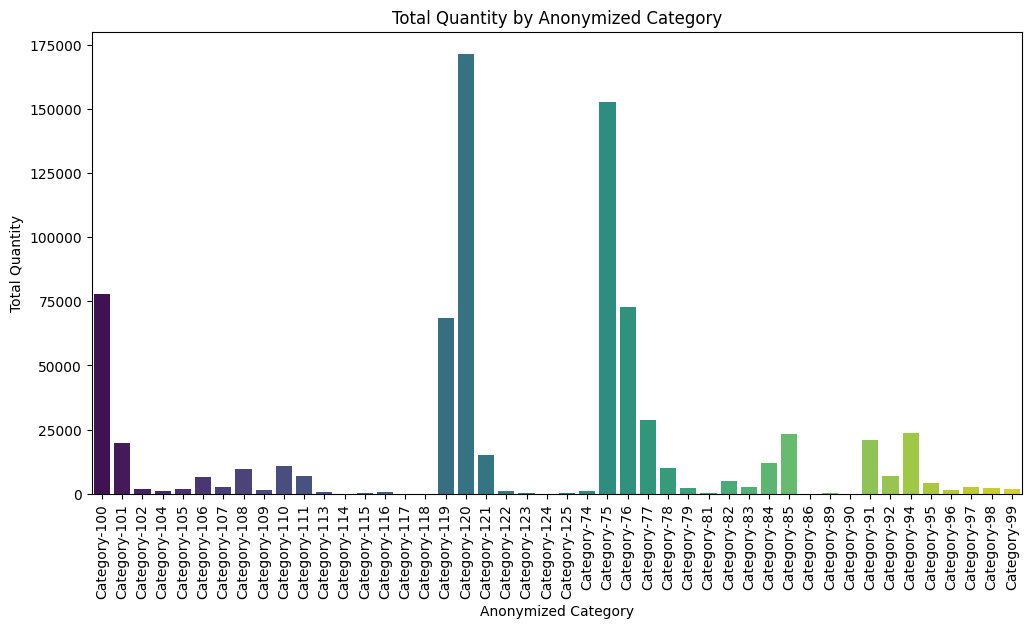

In [ ]:
# Plot 
plt.figure(figsize=(12, 6))
sns.barplot(data=category_summary, x='ANONYMIZED CATEGORY', y='total_quantity', palette='viridis')
plt.title('Total Quantity by Anonymized Category')
plt.xlabel('Anonymized Category')
plt.ylabel('Total Quantity')
plt.xticks(rotation=90)  # Rotate category labels for readability
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_408\2119126339.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_summary, x='ANONYMIZED CATEGORY', y='total_value', palette='plasma')


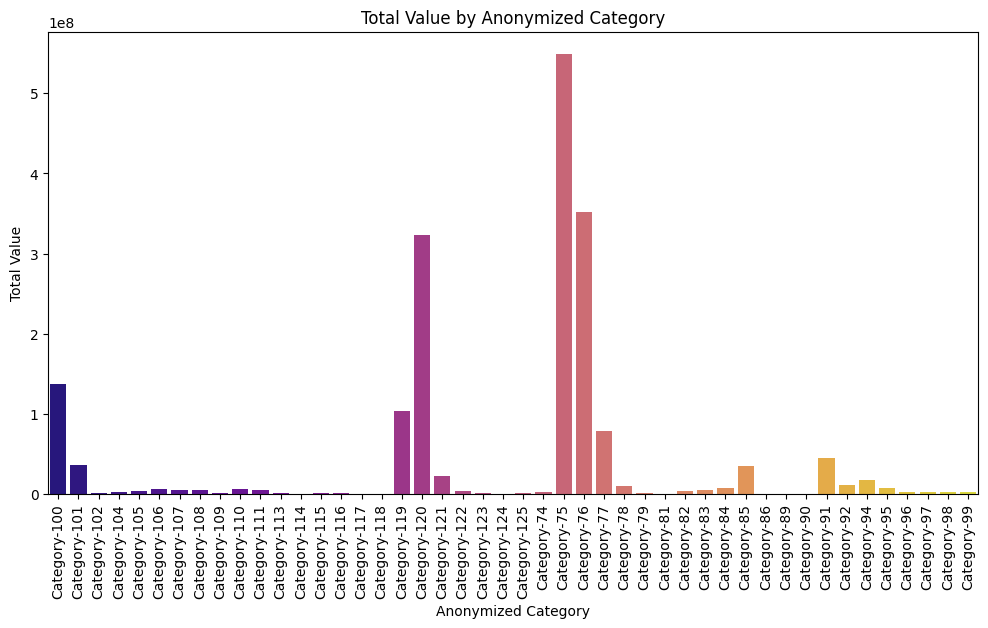

In [13]:
# Plot total value by category
plt.figure(figsize=(12, 6))
sns.barplot(data=category_summary, x='ANONYMIZED CATEGORY', y='total_value', palette='plasma')
plt.title('Total Value by Anonymized Category')
plt.xlabel('Anonymized Category')
plt.ylabel('Total Value')
plt.xticks(rotation=90)  # Rotate category labels for readability
plt.show()

### Summary of Total Quantity and Value by **ANONYMIZED CATEGORY**

#### Key Observations:

1. **Top Performing Categories**:
   - **Category-120** has the highest total quantity (171,443) and value (322,737,950.0), making it the most popular and highest-grossing category.
   - **Category-75** follows closely with a high total value (549,509,348.0) despite a lower quantity (152,643), indicating higher-priced items.

2. **Low Performing Categories**:
   - **Category-114**, **Category-122**, and **Category-124** have very low quantities (4 each) and low values, indicating potential underperformance or niche items.
   - **Category-117** and **Category-86** also show low sales, suggesting a need for strategic evaluation.

3. **Moderate Performers**:
   - Categories like **Category-101**, **Category-107**, and **Category-111** have moderate sales and value, showing steady but not exceptional performance.

4. **Sales Distribution**:
   - A significant disparity exists between the top performers and low-performing categories, highlighting the potential for growth in high-performing categories.

#### Recommendations:
- **Focus on Top Categories**: Allocate more resources to **Category-120**, **Category-75**, and **Category-76** for further growth through targeted promotions.
- **Re-assess Low-Performing Categories**: Evaluate the product offerings or marketing strategies for categories like **Category-114** and **Category-122**. Consider phasing out low-performing categories.
- **Balanced Product Mix**: Maintain a diverse product range to ensure steady revenue from both high-performing and niche categories.

These insights can guide strategic decisions regarding marketing, inventory, and product development.


In [14]:
# Grouped by 'ANONYMIZED BUSINESS' and calculate total quantity and value
business_summary = df.groupby('ANONYMIZED BUSINESS').agg(
    total_quantity=('QUANTITY', 'sum'),  # Sum of quantities for each business
    total_value=('UNIT PRICE', 'sum')   # Sum of unit prices (I am assuming value is per product sold)
).reset_index()  

In [15]:
# Result
business_summary.head() 

,ANONYMIZED BUSINESS,total_quantity,total_value
0,Business-0000,8,10445.0
1,Business-0005,1,2645.0
2,Business-0029,26,18385.0
3,Business-003d,98,73251.0
4,Business-0072,127,194501.0


### Trends Over Time

In [16]:
# Grouped by Month-Year and calculate total quantity and total value
monthly_sales = df.groupby('Month-Year').agg(
    total_quantity=('QUANTITY', 'sum'),
    total_value=('UNIT PRICE', 'sum')
).reset_index()


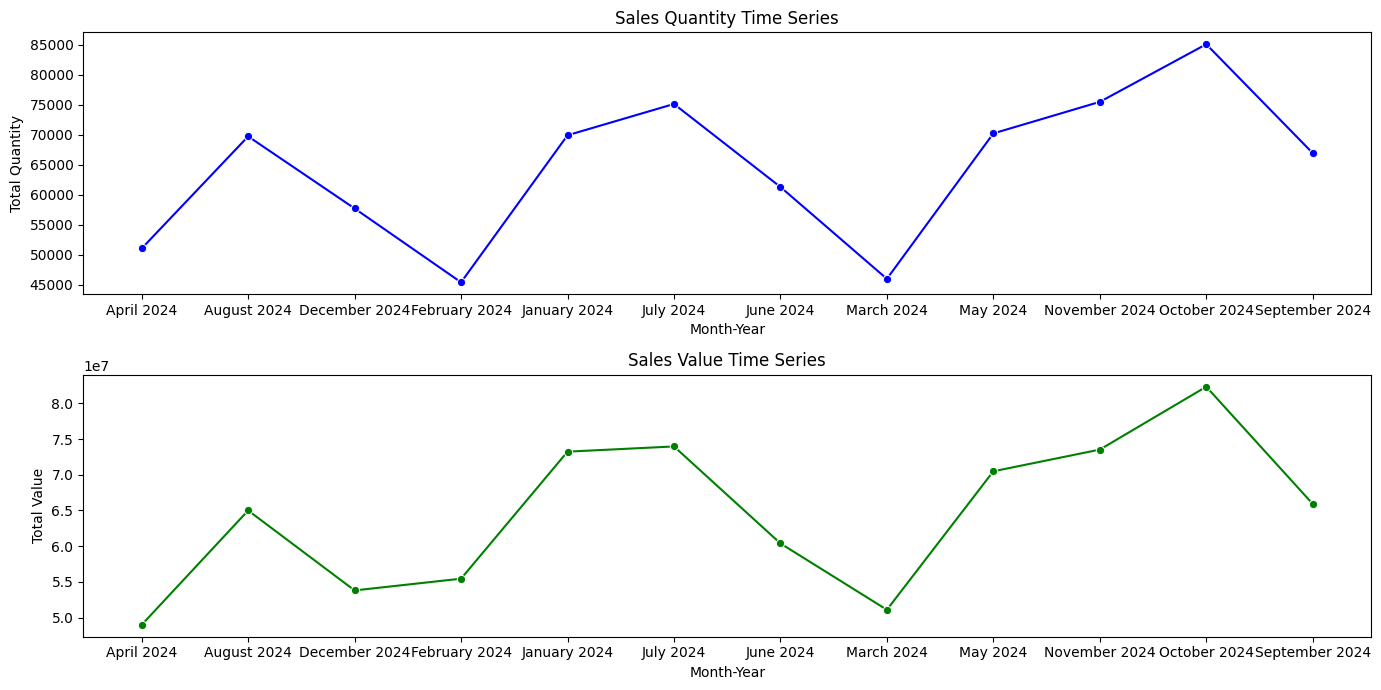

In [ ]:
# Plotting the time series for total_quantity and total_value
plt.figure(figsize=(14, 7))

# Plot Total Quantity over time
plt.subplot(2, 1, 1)
sns.lineplot(data=monthly_sales, x='Month-Year', y='total_quantity', marker='o', color='blue')
plt.title('Sales Quantity Time Series')
plt.xlabel('Month-Year')
plt.ylabel('Total Quantity')

# Plot Total Value over time
plt.subplot(2, 1, 2)
sns.lineplot(data=monthly_sales, x='Month-Year', y='total_value', marker='o', color='green')
plt.title('Sales Value Time Series')
plt.xlabel('Month-Year')
plt.ylabel('Total Value')

# Adjusted layout to ensure no overlap
plt.tight_layout()
plt.show()

In [ ]:
# Grouped data by Product and calculate total quantity and total value
product_sales = df.groupby('ANONYMIZED PRODUCT').agg(
    total_quantity=('QUANTITY', 'sum'),
    total_value=('UNIT PRICE', 'sum')
).reset_index()

# Verify
product_sales.head()

,ANONYMIZED PRODUCT,total_quantity,total_value
0,Product-0001,286,452130.0
1,Product-0031,49,5238.0
2,Product-004f,8,34160.0
3,Product-02e4,225,36480.0
4,Product-031c,1242,810095.0


In [52]:
# Top 5 products based on total quantity
top_quantity_products = product_sales.sort_values(by='total_quantity', ascending=False).head(5)

# Check the result
top_quantity_products


,ANONYMIZED PRODUCT,total_quantity,total_value
339,Product-66e0,47170,28096835.0
753,Product-e805,43577,154127607.0
477,Product-8f75,38032,64124090.0
128,Product-29ee,36639,16776812.0
214,Product-4156,28704,23124899.0


In [20]:
# Top 5 products based on total value
top_value_products = product_sales.sort_values(by='total_value', ascending=False).head(5)

# Result
top_value_products


,ANONYMIZED PRODUCT,total_quantity,total_value
753,Product-e805,43577,154127607.0
477,Product-8f75,38032,64124090.0
339,Product-66e0,47170,28096835.0
681,Product-d09c,18303,24360267.0
109,Product-2175,12044,24343045.0


# Section 3: Advanced Analysis 

In [22]:
df.head()

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,Month-Year,TOTAL VALUE
0,2024-08-18 21:32:00,Category-106,Product-21f4,Business-de42,Location-1ba8,1,850.0,August 2024,850.0
1,2024-08-18 21:32:00,Category-120,Product-4156,Business-de42,Location-1ba8,2,1910.0,August 2024,3820.0
2,2024-08-18 21:32:00,Category-121,Product-49bd,Business-de42,Location-1ba8,1,3670.0,August 2024,3670.0
3,2024-08-18 21:32:00,Category-76,Product-61dd,Business-de42,Location-1ba8,1,2605.0,August 2024,2605.0
4,2024-08-18 21:32:00,Category-119,Product-66e0,Business-de42,Location-1ba8,5,1480.0,August 2024,7400.0


In [24]:

business_summary = df.groupby("ANONYMIZED BUSINESS").agg(
    total_quantity=("QUANTITY", "sum"),
    total_value=("TOTAL VALUE", "sum"),
    transaction_count=("ANONYMIZED BUSINESS", "count")  # Count occurrences
).reset_index()



In [28]:
# Display the summarized data
print(business_summary.head())

  ANONYMIZED BUSINESS  total_quantity  total_value  transaction_count  \
0       Business-0000               8      10445.0                  8   
1       Business-0005               1       2645.0                  1   
2       Business-0029              26      77340.0                  6   
3       Business-003d              98     221761.0                 31   
4       Business-0072             127     225056.0                101   

  Value_Category  
0   Medium Value  
1      Low Value  
2   Medium Value  
3   Medium Value  
4   Medium Value  


`Forecasting`

In [30]:
# Aggregate sales by Month-Year
df_monthly = df.groupby(df['DATE'].dt.to_period('M')).agg({'TOTAL VALUE': 'sum'}).reset_index()

In [ ]:
# Converting period to datetime
df_monthly['DATE'] = df_monthly['DATE'].dt.to_timestamp()

In [33]:
# Set date as index
df_monthly.set_index('DATE', inplace=True)

In [34]:

df_monthly.head()

,TOTAL VALUE
DATE,
2024-01-01,191349182.0
2024-02-01,130626309.0
2024-03-01,117698597.0
2024-04-01,123188281.0
2024-05-01,170372397.0


In [38]:
# fit the model
model = ExponentialSmoothing(df_monthly['TOTAL VALUE'], trend='add')
model_fit = model.fit()

# Forecast the next 3 months
forecast = model_fit.forecast(steps=3)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


 `I used the moving average method is simple, effective for not long forescating periods.`

In [42]:
df_monthly['forecast'] = df_monthly['TOTAL VALUE'].rolling(window=3, min_periods=1).mean()


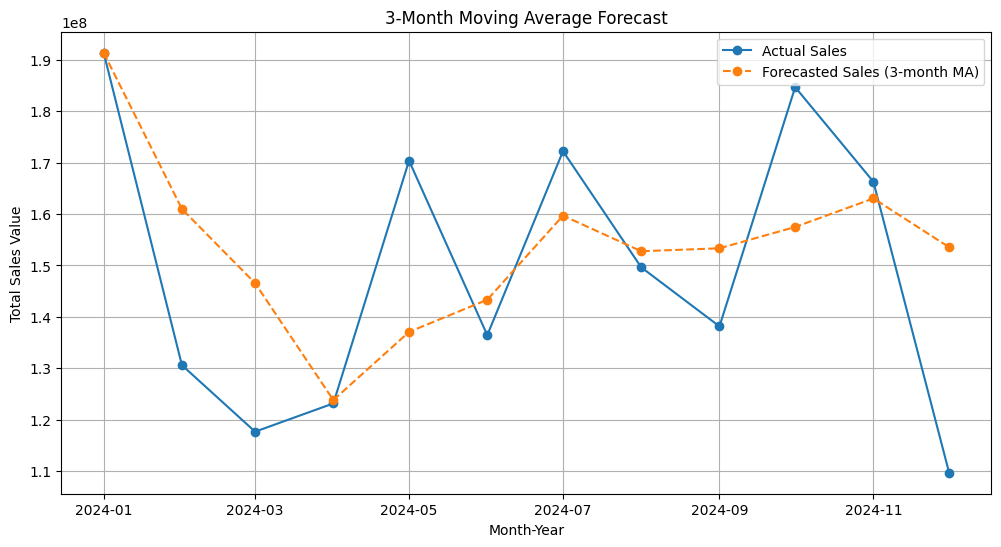

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index, df_monthly['TOTAL VALUE'], label='Actual Sales', marker='o')
plt.plot(df_monthly.index, df_monthly['forecast'], label='Forecasted Sales (3-month MA)', linestyle='dashed', marker='o')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales Value')
plt.title('3-Month Moving Average Forecast')
plt.legend()
plt.grid()
plt.show()


In [44]:
future_forecast = df_monthly['forecast'].iloc[-3:].mean()
print(f'Estimated Sales for the Next 3 Months: {future_forecast:.2f}')


Estimated Sales for the Next 3 Months: 158020477.67


`Correlation Analysis`

In [47]:
df.head()

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,Month-Year,TOTAL VALUE
0,2024-08-18 21:32:00,Category-106,Product-21f4,Business-de42,Location-1ba8,1,850.0,August 2024,850.0
1,2024-08-18 21:32:00,Category-120,Product-4156,Business-de42,Location-1ba8,2,1910.0,August 2024,3820.0
2,2024-08-18 21:32:00,Category-121,Product-49bd,Business-de42,Location-1ba8,1,3670.0,August 2024,3670.0
3,2024-08-18 21:32:00,Category-76,Product-61dd,Business-de42,Location-1ba8,1,2605.0,August 2024,2605.0
4,2024-08-18 21:32:00,Category-119,Product-66e0,Business-de42,Location-1ba8,5,1480.0,August 2024,7400.0


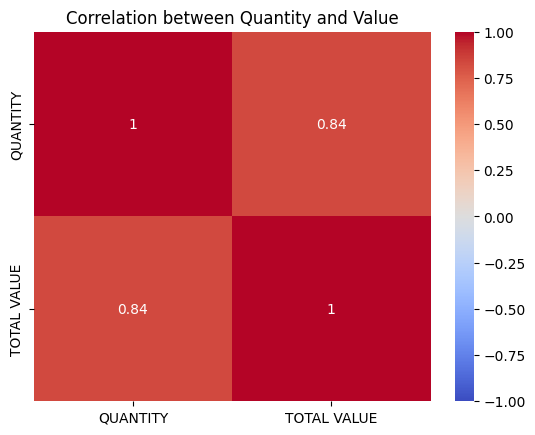

In [ ]:

correlation_matrix = df[['QUANTITY', 'TOTAL VALUE']].corr()

# Plotting the correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Quantity and Value')
plt.show()


# Section 4: Strategic Insights and Recommendations 

In [57]:
least_perfroming_category_product = category_summary.sort_values(by='total_value', ascending=True).head(10)

# Display the result
print(least_perfroming_category_product)


   ANONYMIZED CATEGORY  total_quantity  total_value
15        Category-117               5       1550.0
35         Category-86               8       3320.0
16        Category-118              21       7560.0
22        Category-124               4      10060.0
12        Category-114               4      10440.0
37         Category-90              15      15750.0
30         Category-81             144      72663.0
36         Category-89             241     138575.0
23        Category-125             123     297060.0
14        Category-116             856     422745.0


In [58]:
least_perfroming_category_product = category_summary.sort_values(by='total_quantity', ascending=True).head(10)

# Display the result
print(least_perfroming_category_product)

   ANONYMIZED CATEGORY  total_quantity  total_value
22        Category-124               4      10060.0
12        Category-114               4      10440.0
15        Category-117               5       1550.0
35         Category-86               8       3320.0
37         Category-90              15      15750.0
16        Category-118              21       7560.0
23        Category-125             123     297060.0
30         Category-81             144      72663.0
36         Category-89             241     138575.0
21        Category-123             286     730730.0


`Product Strategy:`

After analyzing the performance of the last 5 categories with poor sales in both quantity and value, I recommend that the marketing team focus their efforts on Category 124. Despite selling only 4 units, Category 124 generated a relatively high revenue, outperforming Category 117 and Category 86 in terms of value. This indicates that, although the volume is currently low, the products in Category 124 have strong potential to generate good revenue with the right marketing push. If the team can drive more awareness and sales for this category, we can expect a significant impact on overall business performance.

`Operational Efficiency:`

Given the expected surge in sales over the next 3 months, it is important to ensure that fast-moving products and high-performing categories are well-stocked. To optimize inventory management and avoid stockouts, the team should:

* Forecast Demand: Based on historical sales data and seasonal trends, identify fast-moving products and categories that are likely to see increased demand.

* Early Procurement: The procurement team should begin reaching out to vendors well in advance to secure stock for these high-demand items. Early communication will ensure timely deliveries and prevent delays.

* Order Preparation: As the sales team starts taking pre-orders, ensure that the dispatch and delivery teams are aligned with the inventory plan. This proactive approach will help in smooth order fulfillment and customer satisfaction.

By aligning these efforts, the company can streamline operations, prevent inventory shortages, and ensure timely delivery to meet the expected demand.